In [1]:
# Import Necessary Libiraries
import os
import numpy as np
import tensorflow as tf
import shutil
import glob
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

### 2. Data Understanding

In [2]:
train_dir = 'drive/My Drive/PaymentReceipt/dataset/train'
test_dir = 'drive/My Drive/PaymentReceipt/dataset/test'
val_dir = 'drive/My Drive/PaymentReceipt/dataset/val'

In [3]:
os.listdir(train_dir)

['KPay', 'AYAPay', 'CBPay', 'WavePay', 'Other']

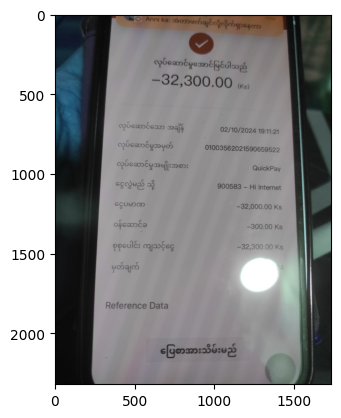

In [ ]:
import cv2
import matplotlib.pyplot as plt

files = glob.glob(os.path.join(val_dir,'KPay') + '/*')[10]
image = cv2.imread(files)
plt.imshow(image)


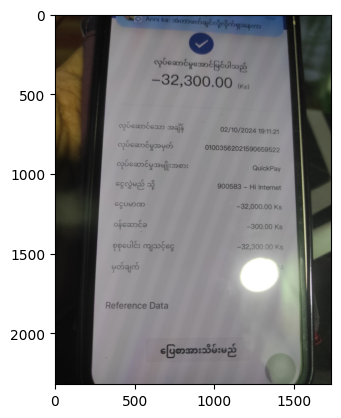

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [ ]:
image_size = image_rgb.shape
print(f"Image size: {image_size}")

Image size: (2320, 1736, 3)


### 3.Data Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''datagen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)'''

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)


In [14]:
batch_size = 5
target_size = (270, 270)
train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
val_set = datagen_val.flow_from_directory(val_dir,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='categorical',
                                          shuffle=False)
test_set = datagen_test.flow_from_directory(test_dir,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 515 images belonging to 5 classes.
Found 94 images belonging to 5 classes.
Found 110 images belonging to 5 classes.


### 4. Modeling

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=(270, 270, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64,(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_set,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=val_set,
                    verbose=2)

Epoch 1/10
103/103 - 47s - 461ms/step - accuracy: 0.5903 - loss: 1.2118 - val_accuracy: 0.6809 - val_loss: 0.7836
Epoch 2/10
103/103 - 10s - 95ms/step - accuracy: 0.7670 - loss: 0.7210 - val_accuracy: 0.8404 - val_loss: 0.4315
Epoch 3/10
103/103 - 9s - 84ms/step - accuracy: 0.8699 - loss: 0.4300 - val_accuracy: 0.7340 - val_loss: 0.5976
Epoch 4/10
103/103 - 9s - 90ms/step - accuracy: 0.8117 - loss: 0.6913 - val_accuracy: 0.8617 - val_loss: 0.4808
Epoch 5/10
103/103 - 8s - 75ms/step - accuracy: 0.9126 - loss: 0.3059 - val_accuracy: 0.8298 - val_loss: 0.8006
Epoch 6/10
103/103 - 9s - 89ms/step - accuracy: 0.9243 - loss: 0.2987 - val_accuracy: 0.8936 - val_loss: 0.3108
Epoch 7/10
103/103 - 9s - 89ms/step - accuracy: 0.9476 - loss: 0.1930 - val_accuracy: 0.8936 - val_loss: 0.2497
Epoch 8/10
103/103 - 8s - 81ms/step - accuracy: 0.9534 - loss: 0.1421 - val_accuracy: 0.9149 - val_loss: 0.3698
Epoch 9/10
103/103 - 10s - 97ms/step - accuracy: 0.9456 - loss: 0.2625 - val_accuracy: 0.9043 - val_l

In [19]:
base_path = 'drive/My Drive/'
save_model = os.path.join(base_path, 'PaymentReceipt', 'model')
os.makedirs(save_model, exist_ok= True)

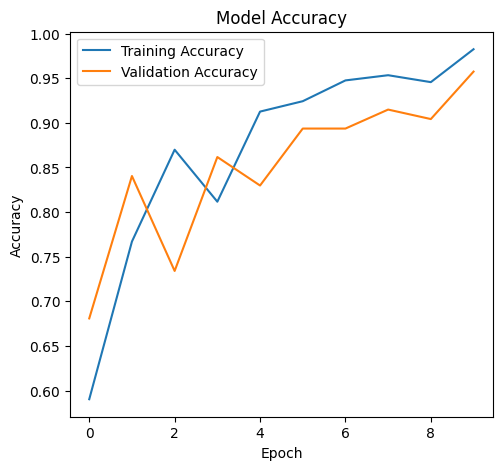

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.savefig(os.path.join(save_model,'Model_Accuracy_' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')

### 5. Evaluation

In [21]:
class_dict = test_set.class_indices
y_predicted = model.predict(test_set)
y_pred = []
for i in y_predicted:
  y_pred.append(np.argmax(i))

22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


In [22]:
y_test = test_set.classes.tolist()

In [23]:
class_dict

{'AYAPay': 0, 'CBPay': 1, 'KPay': 2, 'Other': 3, 'WavePay': 4}

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14  1  0  0  2]
 [ 0 17  0  0  1]
 [ 0  0 37  0  4]
 [ 0  2  0  3  3]
 [ 0  0  0  0 26]]


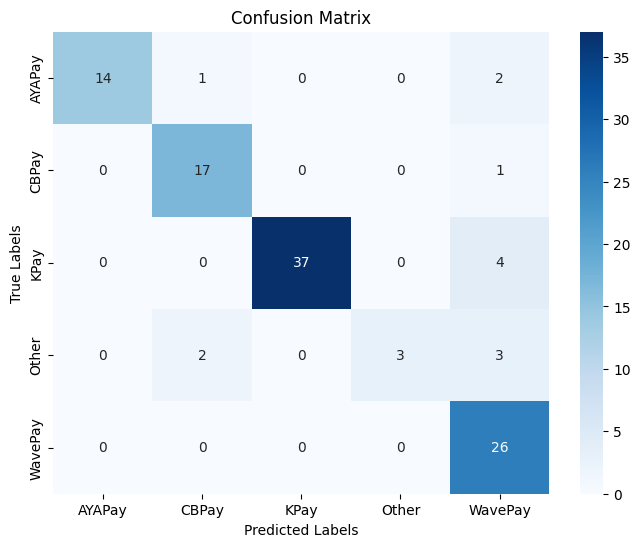

In [25]:
import seaborn as sns
# Define class labels (optional)
class_names = test_set.class_indices.keys()
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(save_model,'confusion_matrix_cnn_b' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')
plt.show()

Accuracy Score: 88.18181818181819%
Precision Score: 91.44444444444444%
Recall Score: 80.90825761198788%
F1 Score: 82.61689640297449%


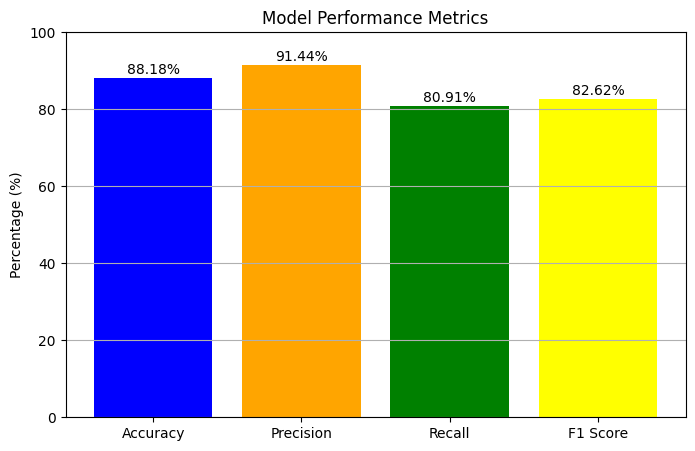

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred,average='macro')*100
f1 = f1_score(y_test, y_pred, average='macro') * 100

# Print metrics
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")
print(f"F1 Score: {f1}%")

# Plotting the metrics
metrics = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics, color=['blue', 'orange', 'green', 'yellow'])
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.title('Model Performance Metrics')
plt.grid(axis='y')

# Display the value on top of the bars
for index, value in enumerate(metrics):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')

plt.savefig(os.path.join(save_model,'accuracy_cnn_b' + str(batch_size) + '.png'), dpi=300, bbox_inches='tight')
plt.show()

### Save Model

In [27]:
save_file = save_model + '/cnn_b' + str(batch_size) +  '.h5'

# Save the entire model to a HDF5 file
model.save(save_file)

In [ ]:
'''from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# load and preprocess the image
def load_and_preprocess_image(image_path, target_size = (270, 270)):

    # Load the image
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)
    # Normalize the image (if your model was trained on normalized data)
    image /= 255.0
    return image

predict = {}
class_labels = ['AYAPay', 'CBPay', 'KPay', 'Other', 'WavePay']
image_folder = os.path.join(base_path, 'PaymentReceipt', 'dataset/deploy test data')
test_images_path = glob.glob(image_folder + '/**/*')

if len(test_images_path) > 0:
  # Load the trained model
  loaded_model = load_model(save_file)

for img_path in test_images_path:
  dir, fileName = os.path.split(img_path)
  # Preprocess the image
  image = load_and_preprocess_image(img_path)

  # Make predictions
  predictions = loaded_model.predict(image)
  # Process the predictions
  predicted_class = np.argmax(predictions, axis=1)
  predicted_class = class_labels[predicted_class[0]]
  predict[fileName] = predicted_class
  print(fileName,':', predicted_class)'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
3.PNG : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
6.PNG : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Other_1.jpg : Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Other_28.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
WavePay_64.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
WavePay_102.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
WavePay_79.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
WavePay_25.jpg : WavePay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
KPay_1.JPG : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
KPay_113.jpg : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
KPay_34.jpg : KPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
CBPay_0.jpg : Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
CBPay_38.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
CBPay_62.jpg : CBPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
AYAPay_14.jpg : AYAPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
AYAPay_38.jpg : AYAPay
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
AYAPay_33.jpg : Ot

#### Hyperparameter Tunning